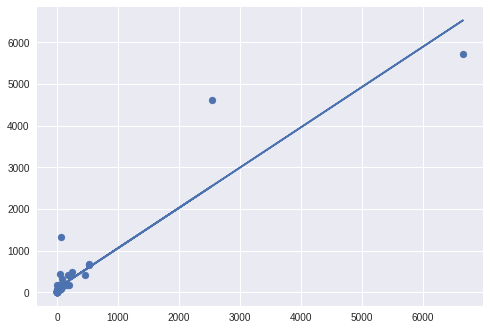

In [6]:
!pip install -U -q PyDrive
import numpy as np
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# 2. Load a file by ID and create local file.
downloaded = drive.CreateFile({'id':'1_nRWYf4XlJrH5DvG4wcgyc957qgMJUIt'}) # replace fileid with Id of file you want to access
downloaded.GetContentFile('export.txt') # now you can use export.csv share

import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

#read data

dataframe = pd.read_fwf('export.txt')
x_values = dataframe[['Brain']]
y_values = dataframe[['Body']]
x_values = np.asarray(x_values)
y_values = np.asarray(y_values)
#train model on data
body_reg = linear_model.LinearRegression()
body_reg.fit(x_values, y_values)

#visualize results
plt.scatter(x_values, y_values)
plt.plot(x_values, body_reg.predict(x_values))
plt.show()